In [1]:
%store -r pdict

In [2]:
%store -r asmbly_name

In [3]:
pdict['216597.6'] = 'Salmonella enterica subsp. enterica serovar Typhimurium str. SL1344'
pdict['511145.12'] = 'Escherichia coli str. K-12 substr. MG1655'
pdict['243277.26'] = 'Vibrio'

In [4]:
from ete3 import Tree, TreeStyle, Tree, TextFace, add_face_to_node, faces
import pandas as pd

In [5]:
ts = TreeStyle()
ts.show_leaf_name = False

In [6]:
def mylayout(node):
    if not node.is_leaf():
        F = TextFace(node.name, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')
    if node.is_leaf():
        F = TextFace(node.org, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')

In [7]:
cd ~/workspace/bio/sRNA/ecoli/gloome/GLOOME_run_15167366679221/

/Users/aug/workspace/bio/sRNA/ecoli/gloome/GLOOME_run_15167366679221


In [8]:
t = Tree('Tree_with_inner_nodes_notation.ph', format=1)

In [9]:
moa = [i for i in t.iter_leaf_names()]

In [10]:
%store moa

Stored 'moa' (list)


In [11]:
for node in t.traverse():
    if node.name in asmbly_name:
        node.add_features(org=asmbly_name[node.name])

In [12]:
ts.layout_fn = mylayout

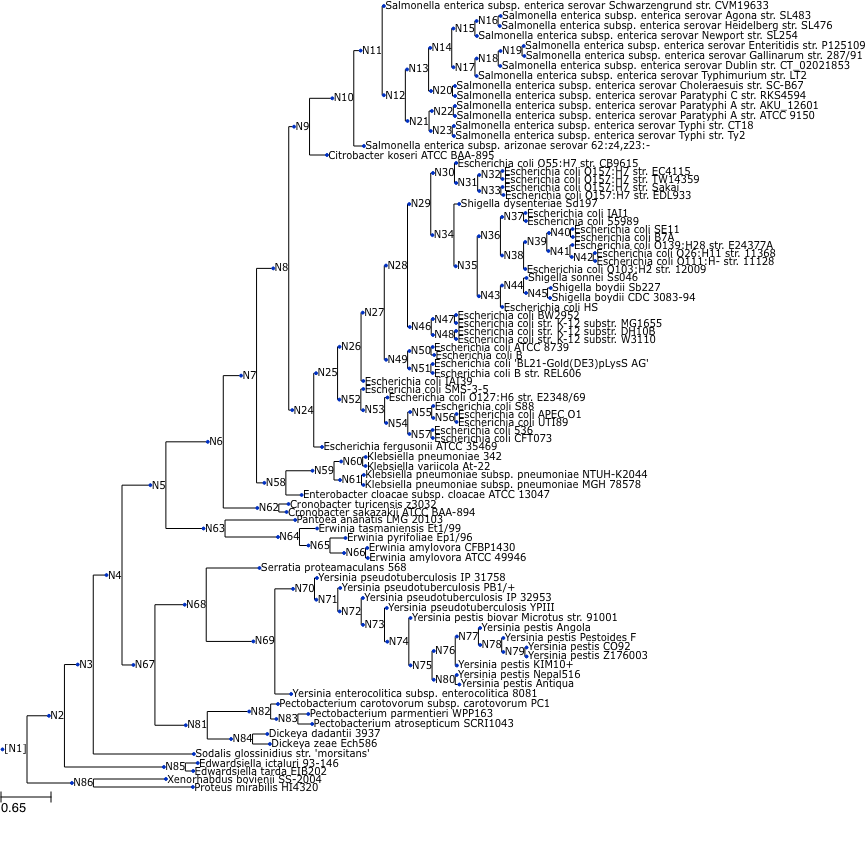

In [13]:
t.render('%%inline', tree_style=ts)

In [14]:
df = pd.read_table('Ancestral_reconstuction_of_states_per_position_per_node.txt')

In [15]:
df

,POS,Node,State,Prob
0,1,GCF_000020745.1,1,0.000000e+00
1,1,GCF_000020885.1,1,0.000000e+00
2,1,GCF_000020705.1,1,0.000000e+00
3,1,N16,1,6.677000e-06
4,1,GCF_000016045.1,1,0.000000e+00
5,1,N15,1,3.072000e-06
6,1,GCF_000009505.1,1,0.000000e+00
7,1,GCF_000009525.1,1,0.000000e+00
8,1,N19,1,2.252000e-05
9,1,GCF_000020925.1,1,0.000000e+00


#### Only include those nodes ancestral to hub strain

In [16]:
loi = t.get_leaves_by_name('GCF_000005845.2')[0].get_ancestors()
l = [i.name for i in loi]
ndf = df[df.Node.isin(l)]

#### Make all node positions numeric

In [17]:
def make_num(val):
    if val.startswith('N'):
        n = val.split('N')[1]
    elif val.startswith('['):
        n = 1
    return int(n)

In [18]:
ndf['Node'] = ndf['Node'].apply(make_num)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Determine the most probable gain node for each sRNA (POS)

In [19]:
gnd = dict()

In [20]:
ndf.dropna(subset=['Node'], inplace=True)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
for pos, data in ndf.groupby('POS'):
    gn = '999' 
    for i, row in data.sort_values(by=['Node'], ascending=False).iterrows():
        if row['Prob'] >= 0.70:
            gn = row['Node']
            continue
        else:
            break
    gnd[pos] = gn

In [22]:
gnd

{1: 24.0,
 2: 25.0,
 3: 25.0,
 4: 8.0,
 5: 25.0,
 6: 6.0,
 7: 2.0,
 8: 6.0,
 9: 24.0,
 10: 6.0,
 11: 8.0,
 12: 8.0,
 13: 8.0,
 14: 7.0,
 15: 24.0,
 16: 8.0,
 17: 6.0,
 18: 8.0,
 19: 7.0,
 20: 7.0,
 21: 24.0,
 22: 8.0,
 23: 24.0,
 24: 6.0,
 25: 8.0,
 26: 8.0,
 27: 46.0,
 28: 25.0,
 29: 7.0,
 30: 24.0,
 31: 6.0,
 32: 6.0,
 33: 6.0,
 34: 6.0,
 35: 24.0,
 36: 2.0,
 37: 2.0,
 38: 24.0,
 39: 4.0,
 40: 5.0,
 41: 4.0,
 42: 26.0,
 43: 6.0,
 44: 25.0,
 45: 46.0,
 46: 6.0,
 47: 7.0,
 48: 4.0,
 49: 8.0,
 50: 6.0,
 51: 24.0,
 52: 24.0,
 53: 7.0,
 54: 5.0,
 55: 7.0,
 56: 8.0,
 57: 6.0,
 58: 5.0,
 59: 2.0,
 60: 5.0,
 61: 24.0,
 62: 6.0,
 63: 7.0,
 64: 8.0,
 65: 2.0,
 66: 8.0,
 67: 2.0,
 68: 7.0,
 69: 27.0,
 70: 7.0,
 71: 8.0,
 72: 2.0,
 73: 6.0,
 74: 6.0,
 75: 8.0,
 76: 27.0,
 77: 2.0,
 78: 2.0,
 79: 24.0,
 80: 5.0,
 81: 7.0}

### Add gain node frequency to the tree

In [23]:
gns = pd.Series(gnd).value_counts()

In [24]:
d = {'N' + str(int(k)): v for k, v in gns.to_dict().items()}

In [25]:
for node in t.traverse():
    if node.name in d:
        node.add_features(gain=d[node.name])
    else:
        node.add_features(gain=0)

In [26]:
def gnlayout(node):
    if not node.is_leaf():
        F = TextFace(node.name, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')
        node.img_style["size"] += node.gain # Increase node sphere size by gain frequency
        if node.gain > 0:
            G = TextFace(node.gain, tight_text = True, fsize=14, bold=True, fgcolor='Green')
            add_face_to_node(G, node, column=0, position='branch-top')
    if node.is_leaf():
        F = TextFace(node.org, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')

In [27]:
node.img_style

{'bgcolor': '#FFFFFF',
 'draw_descendants': True,
 'faces_bgcolor': '#FFFFFF',
 'fgcolor': '#0030c1',
 'hz_line_color': '#000000',
 'hz_line_type': 0,
 'hz_line_width': 0,
 'node_bgcolor': '#FFFFFF',
 'shape': 'circle',
 'size': 3,
 'vt_line_color': '#000000',
 'vt_line_type': 0,
 'vt_line_width': 0}

In [28]:
ts.layout_fn = gnlayout

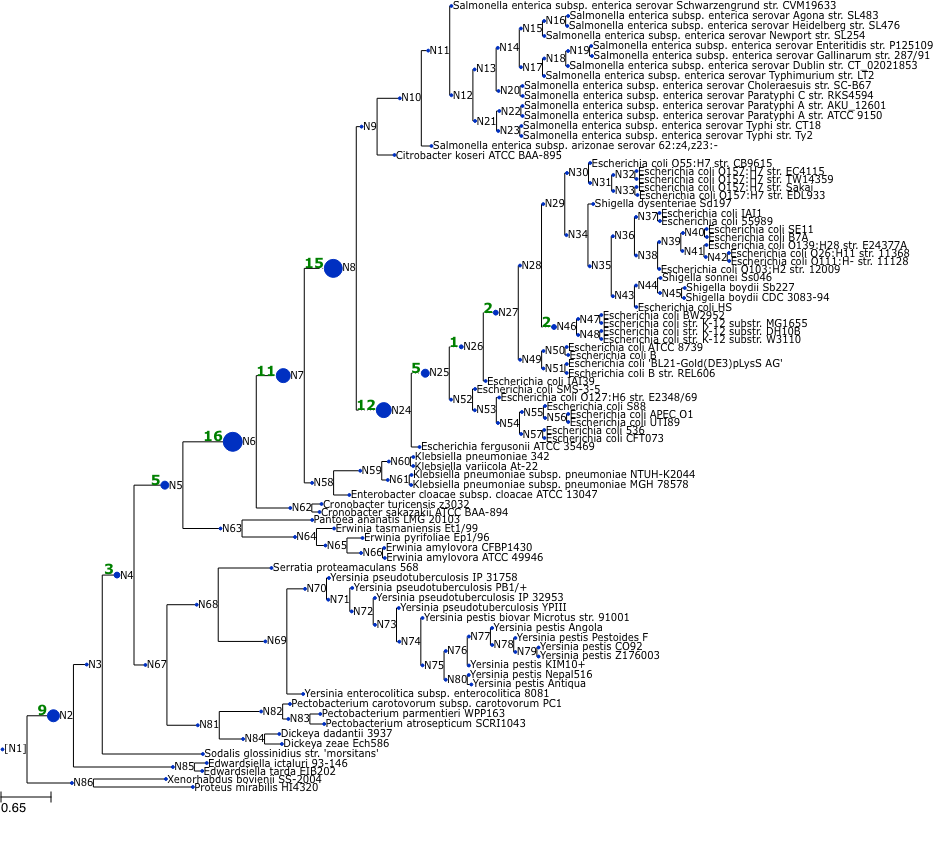

In [29]:
t.render('%%inline', tree_style=ts)

%store -r g

ecoli = t.search_nodes(name='N52')[0]

kids = [node.name for node in ecoli.get_descendants() if not node.name.startswith('N')]

%store kids

### Bin the sRNAs

In [30]:
g = ['C0465_rf', 'Esr1_EC', 'Esr2_EC', 'Esr4_EC', 'Esr5_EC', 'Esr6_EC',
       'Esr8_EC', 'Esr9_EC', 'OrzO-P_rf', 'P26_rf', 'STnc130_rf', 'STnc180_rf',
       'STnc240_rf', 'STnc3000_ST', 'STnc3160_ST', 'STnc3390_ST',
       'STnc4080_ST', 'STnc410_rf', 'STnc4180_ST', 'STnc430_rf', 'STnc480_rf',
       'STnc520_ST', 'STnc740_ST', 'STnc880_ST', 'Tpke11_EC_rf', 'arcZ_EC_rf',
       'c0293_EC', 'c0299_EC', 'c0343_EC', 'c0719_EC', 'csrB_EC', 'csrC_EC_rf',
       'cyaR_EC_rf', 'dsrA_EC', 'eyeA_EC', 'ffs_EC', 'fnrS_EC_rf',
       'gadY_EC_rf', 'gcvB_EC', 'glmY_EC_rf', 'glmZ_EC_rf', 'is128_EC',
       'iscRS_rf', 'isrA_EC', 'isrC_EC', 'istR_EC_rf', 'mgrR_STnc560_EC_rf',
       'micA_EC_rf', 'micC_EC_rf', 'micF_EC_rf', 'ohsC_EC', 'ompn3_EC',
       'omrA_EC', 'omrB_EC', 'oxyS_EC', 'psrD_EC', 'psrN_EC',
       'psrO_SraG_EC_rf', 'rnpB_EC', 'rprA_EC_rf', 'rseX_EC_rf', 'rybB_EC',
       'rydB_EC_rf', 'rydC_EC', 'ryeB_EC_rf', 'ryfA_EC', 'ryhB_EC_rf',
       'ryjA_sraL_EC_rf', 'ryjB_EC', 'sRNA12_ST', 'sok_rf-3', 'spf_EC',
       'sroB_EC', 'sroC_EC', 'sroE_EC', 'sroH_EC', 'ssrA_EC', 'ssrS_6S_EC_rf',
       'symR_EC', 'tff_t44_EC_rf', 'tp2_ST_rf']

g.columns

In [31]:
s = {x:y for (x, y) in zip(range(1, 82), g)}

In [32]:
s

{1: 'C0465_rf',
 2: 'Esr1_EC',
 3: 'Esr2_EC',
 4: 'Esr4_EC',
 5: 'Esr5_EC',
 6: 'Esr6_EC',
 7: 'Esr8_EC',
 8: 'Esr9_EC',
 9: 'OrzO-P_rf',
 10: 'P26_rf',
 11: 'STnc130_rf',
 12: 'STnc180_rf',
 13: 'STnc240_rf',
 14: 'STnc3000_ST',
 15: 'STnc3160_ST',
 16: 'STnc3390_ST',
 17: 'STnc4080_ST',
 18: 'STnc410_rf',
 19: 'STnc4180_ST',
 20: 'STnc430_rf',
 21: 'STnc480_rf',
 22: 'STnc520_ST',
 23: 'STnc740_ST',
 24: 'STnc880_ST',
 25: 'Tpke11_EC_rf',
 26: 'arcZ_EC_rf',
 27: 'c0293_EC',
 28: 'c0299_EC',
 29: 'c0343_EC',
 30: 'c0719_EC',
 31: 'csrB_EC',
 32: 'csrC_EC_rf',
 33: 'cyaR_EC_rf',
 34: 'dsrA_EC',
 35: 'eyeA_EC',
 36: 'ffs_EC',
 37: 'fnrS_EC_rf',
 38: 'gadY_EC_rf',
 39: 'gcvB_EC',
 40: 'glmY_EC_rf',
 41: 'glmZ_EC_rf',
 42: 'is128_EC',
 43: 'iscRS_rf',
 44: 'isrA_EC',
 45: 'isrC_EC',
 46: 'istR_EC_rf',
 47: 'mgrR_STnc560_EC_rf',
 48: 'micA_EC_rf',
 49: 'micC_EC_rf',
 50: 'micF_EC_rf',
 51: 'ohsC_EC',
 52: 'ompn3_EC',
 53: 'omrA_EC',
 54: 'omrB_EC',
 55: 'oxyS_EC',
 56: 'psrD_EC',
 57: 'psr

In [33]:
sdf = pd.concat([pd.Series(gnd), pd.Series(s)], axis=1)

In [34]:
sdf = sdf.rename(columns={0: 'gain_node'})

In [35]:
sdf['gain_node'] = pd.to_numeric(sdf['gain_node'])

In [36]:
bins = [1, 5, 7, 999]
labels = ['old', 'teenage', 'baby']

In [38]:
sdf['age_bin'] = pd.cut(sdf['gain_node'], bins=bins, labels=labels)

In [40]:
sdf

,gain_node,1,age_bin
1,24.0,C0465_rf,baby
2,25.0,Esr1_EC,baby
3,25.0,Esr2_EC,baby
4,8.0,Esr4_EC,baby
5,25.0,Esr5_EC,baby
6,6.0,Esr6_EC,teenage
7,2.0,Esr8_EC,old
8,6.0,Esr9_EC,teenage
9,24.0,OrzO-P_rf,baby
10,6.0,P26_rf,teenage


In [39]:
sdf['age_bin'].value_counts()

baby       37
teenage    27
old        17
Name: age_bin, dtype: int64

In [44]:
blt = Tree('Tree_with_branch_length_by_gain.ph', format=1)

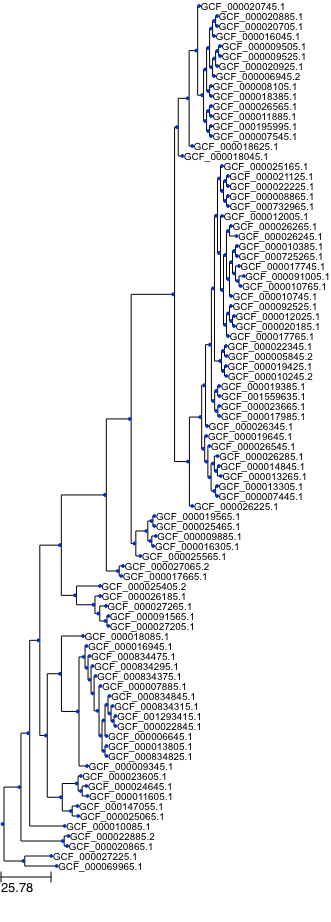

In [45]:
blt.render('%%inline')

In [46]:
sdf

,gain_node,1,age_bin
1,24.0,C0465_rf,baby
2,25.0,Esr1_EC,baby
3,25.0,Esr2_EC,baby
4,8.0,Esr4_EC,teenage
5,25.0,Esr5_EC,baby
6,6.0,Esr6_EC,old
7,2.0,Esr8_EC,old
8,6.0,Esr9_EC,old
9,24.0,OrzO-P_rf,baby
10,6.0,P26_rf,old


In [41]:
sdf.rename(columns={1: 'name'}, inplace=True)

In [42]:
sdf

,gain_node,name,age_bin
1,24.0,C0465_rf,baby
2,25.0,Esr1_EC,baby
3,25.0,Esr2_EC,baby
4,8.0,Esr4_EC,baby
5,25.0,Esr5_EC,baby
6,6.0,Esr6_EC,teenage
7,2.0,Esr8_EC,old
8,6.0,Esr9_EC,teenage
9,24.0,OrzO-P_rf,baby
10,6.0,P26_rf,teenage


In [43]:
%store sdf

Stored 'sdf' (DataFrame)


In [49]:
for i, d in sdf.groupby('age_bin'):
    print(i)
    print(d['name'])

old
6             Esr6_EC
7             Esr8_EC
8             Esr9_EC
10             P26_rf
17        STnc4080_ST
24         STnc880_ST
31            csrB_EC
32         csrC_EC_rf
33         cyaR_EC_rf
34            dsrA_EC
36             ffs_EC
37         fnrS_EC_rf
39            gcvB_EC
40         glmY_EC_rf
41         glmZ_EC_rf
43           iscRS_rf
46         istR_EC_rf
48         micA_EC_rf
50         micF_EC_rf
54            omrB_EC
57            psrN_EC
58    psrO_SraG_EC_rf
59            rnpB_EC
60         rprA_EC_rf
62            rybB_EC
65         ryeB_EC_rf
67         ryhB_EC_rf
72             spf_EC
73            sroB_EC
74            sroC_EC
77            ssrA_EC
78      ssrS_6S_EC_rf
80      tff_t44_EC_rf
Name: name, dtype: object
teenage
4                Esr4_EC
11            STnc130_rf
12            STnc180_rf
13            STnc240_rf
14           STnc3000_ST
16           STnc3390_ST
18            STnc410_rf
19           STnc4180_ST
20            STnc430_rf
22         

In [51]:
bgn = sdf.set_index('name')

In [53]:
%store bgn

Stored 'bgn' (DataFrame)


In [55]:
bgn

,gain_node,age_bin
name,,
C0465_rf,24.0,baby
Esr1_EC,25.0,baby
Esr2_EC,25.0,baby
Esr4_EC,8.0,teenage
Esr5_EC,25.0,baby
Esr6_EC,6.0,old
Esr8_EC,2.0,old
Esr9_EC,6.0,old
OrzO-P_rf,24.0,baby


In [54]:
t.render('blast_gn.png', tree_style=ts)

{'faces': [[4.0, 744.3836898803711, 27.0, 754.3836898803711, 0, '[N1]'],
  [68.44819863016008,
   712.2673797607422,
   82.44819863016008,
   719.2673797607422,
   1,
   'N2'],
  [37.448198630160086,
   704.7673797607422,
   47.448198630160086,
   715.7673797607422,
   1,
   '9'],
  [97.25650163427939,
   660.5347595214844,
   111.25650163427939,
   668.5347595214844,
   2,
   'N3'],
  [132.01155732263072,
   571.5695190429688,
   146.01155732263072,
   578.5695190429688,
   3,
   'N4'],
  [113.01155732263072,
   564.0695190429688,
   123.01155732263072,
   575.0695190429688,
   3,
   '3'],
  [185.8764032646231,
   481.6571044921875,
   199.8764032646231,
   488.6571044921875,
   4,
   'N5'],
  [162.8764032646231,
   475.1571044921875,
   172.8764032646231,
   485.1571044921875,
   4,
   '5'],
  [275.2802052271243,
   437.814208984375,
   289.2802052271243,
   445.814208984375,
   5,
   'N6'],
  [220.28020522712433,
   430.814208984375,
   240.28020522712433,
   441.814208984375,
   5,